### Table of Experiments

#### exp1
- `nux = (2-10)`
- `gamma = [8-15]`
- `number of TRN Neurons = [500, 1000]`
-  No Additional supressional activity at 1000ms for 50ms

#### exp2
- `nux = (2-10)`
- `gamma = [8-15]`
- `number of TRN Neurons = [500, 1000]`
-  Additional supressional activity at 1000ms for 50ms

In [1]:
# To get the lastest pickle files run
! cat pullresults.sh

#!/bin/bash

rsync -auv hameed@login.inm.kfa-juelich.de:/users/hameed/simulenation/src/demyelination/data/ /home/hunaid/simulenation/src/demyelination/data/



In [2]:
import warnings
warnings.filterwarnings('ignore') # warnings are for the weak

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

import os
import sys
import re
import sys

In [4]:
sys.path.append("demyelination/") # we need this to successfully read pickle files

In [1]:
import fna

In [5]:
import pipeline as pipeline

In [6]:
def preparedf (dataobjs):
    # input dataframe
    # output organized data
    if len(dataobjs) == 0:
        raise Exception("No activity files found.")

    parts = dataobjs[0].spikeobj.keys()

    df = pd.DataFrame()

    for part in parts:
        for data in dataobjs:
            data.spikeobj[part].time_offset(250)
            tmp = data.params
            tmp = tmp.update({
                "brainPart" : part,
                "meanSpkRate" : data.spikeobj[part].mean_rate(),
                "pearsonCoeff" : data.metrics['pearsoncoeff'][part],
                "cvIsi" : data.spikeobj[part].cv_isi().mean()
            })
            df = df.append(data.params, ignore_index=True)

    #sortingParams = ["gamma", "nux"]
    #df = df.sort_values(by=sortingParams)

    return df

In [13]:

def makesubplot (data, fig, ax, attr):
    for axis, part in zip([0, 1], ["MGN", "TRN"]):
        d = data[ data["brainPart"] == part ].pivot_table(attr, "nuX_stim", "wMGN")

        p = ax[axis].imshow(d, interpolation="nearest")
        fig.colorbar(p, ax=ax[axis])

        ax[axis].set_title(attr + " " + part)

        ax[axis].set_yticklabels(d.index.values)
        ax[axis].set_xticklabels(d.columns.values)

        ax[axis].set_ylabel("nuX_stim")
        ax[axis].set_xlabel("wMGN")


## Exp1

In [45]:
files2 = pipeline.readfiles("demyelination/data/exp2/activity");
df2 = preparedf(files2);

In [47]:
df2[(df2.exp2_nuX == 12) & (df2.gamma == 4) & (df2.nTRN == 500)]

exp2_nuX  gamma   nTRN brainPart  meanSpkRate  pearsonCoeff     cvIsi
81       12.0    4.0  500.0       MGN     8.211783      0.005256  0.644393
225      12.0    4.0  500.0       TRN    17.206266      0.782844  1.190964

In [44]:
df2[(df2.exp1_nuX == 12) & (df2.gamma == 4) & (df2.nTRN == 500)]

exp1_nuX  gamma   nTRN brainPart  meanSpkRate  pearsonCoeff     cvIsi
116      12.0    4.0  500.0       MGN     8.062087     -0.000876  0.626813
260      12.0    4.0  500.0       TRN    11.824502      0.006766  0.623445

In [8]:
files = pipeline.readfiles("demyelination/data/exp3/activity");


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.3
 Built: Mar 23 2022 13:33:55

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.

** mayavi.mlab ** package is not installed. To have functions using mayavi.mlab please install the package.
** pyspike ** package is not installed. To have functions using pyspike please install the package.
** pyspike ** package is not installed. To have functions using pyspike please install the package.
** mnist.loader ** package is not installed. To have functions using mnist.loader please install the package.
** tables ** package is not installed. To have functions using tables please install the package.


In [12]:
files[0].params

{'exp3_nuX': 15.0,
 'gamma': 2.0,
 'wMGN': 1.0,
 'nuX_stim': 45.0,
 'brainPart': 'TRN',
 'meanSpkRate': 20.515830114530655,
 'pearsonCoeff': 0.01303327394214878,
 'cvIsi': 0.6551068133115768}

In [11]:
# #dir(files[0].spikeobj['TRN'])
# #dir(files[0].spikeobj['TRN'].spiketrains[1001.0])
# for fl in files:
#     spktrn = fl.spikeobj['TRN'].spiketrains[1001.0].spike_times
#     if not(True in (spktrn < 1025) & (spktrn > 1000)):
#         print(fl.params)

In [10]:
#df = preparedf(files);

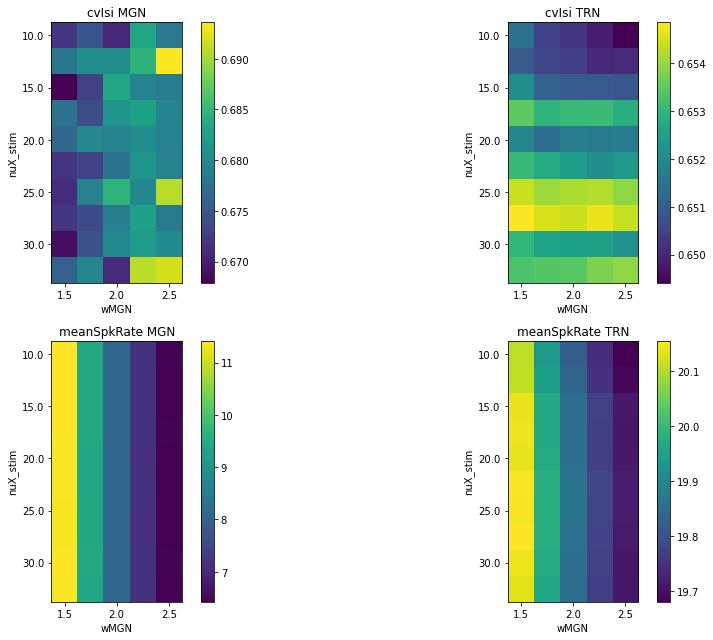

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2)

fig.set_size_inches(13, 9)
plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

makesubplot(df[df.exp3_nuX==15], fig, ax[0], "cvIsi")

makesubplot(df[df.exp3_nuX==15], fig, ax[1], "meanSpkRate")

#pipeline.makesubplot(df, fig, ax[2], "pearsonCoeff")

fig.tight_layout()

In [37]:
#df[df.brainPart == 'TRN'].shape, df.shape
#df.head()
searchdf = df[((df.brainPart == "MGN") & (df.meanSpkRate > 8.15) & (df.meanSpkRate < 8.25)) | ((df.brainPart == "TRN") & (df.meanSpkRate > 17.15) & (df.meanSpkRate < 17.25))]


In [38]:
#searchdf[searchdf.brainPart=='TRN'].sort_values(["exp3_nuX", "gamma", "wMGN", "nuX_stim"])
searchdf.describe()

exp3_nuX      gamma       wMGN   nuX_stim  meanSpkRate  pearsonCoeff  \
count  76.000000  76.000000  76.000000  76.000000    76.000000     76.000000   
mean   14.236842   5.407895   1.723684  28.618421    15.076972      0.007605   
std     0.427970   2.173646   0.660276  14.179767     3.839596      0.003371   
min    14.000000   2.000000   1.000000   5.000000     8.211732     -0.001408   
25%    14.000000   4.000000   1.000000  15.000000    17.151126      0.006120   
50%    14.000000   5.000000   1.500000  30.000000    17.188454      0.007812   
75%    14.000000   7.000000   2.500000  40.000000    17.217413      0.009831   
max    15.000000  10.000000   3.000000  50.000000    17.248298      0.015069   

           cvIsi  
count  60.000000  
mean    0.647113  
std     0.011920  
min     0.643240  
25%     0.644355  
50%     0.644919  
75%     0.645544  
max     0.711733

In [33]:
df[(df.exp3_nuX==15) & (df.gamma==7) & (df.wMGN==3.0)]

exp3_nuX  gamma  wMGN  nuX_stim brainPart  meanSpkRate  pearsonCoeff  \
134       15.0    7.0   3.0      50.0       MGN     5.219194      0.008307   
168       15.0    7.0   3.0       5.0       MGN     5.189673      0.004180   
398       15.0    7.0   3.0      25.0       MGN     5.183450      0.004462   
854       15.0    7.0   3.0      10.0       MGN     5.196988      0.001842   
899       15.0    7.0   3.0      30.0       MGN     5.207875      0.007805   
972       15.0    7.0   3.0      35.0       MGN     5.197492      0.004339   
1331      15.0    7.0   3.0      45.0       MGN     5.202900      0.002241   
1668      15.0    7.0   3.0      40.0       MGN     5.193575      0.002212   
2445      15.0    7.0   3.0      15.0       MGN     5.181225      0.001974   
3108      15.0    7.0   3.0      20.0       MGN     5.198398      0.005809   
3734      15.0    7.0   3.0      50.0       TRN    19.602228      0.010799   
3768      15.0    7.0   3.0       5.0       TRN    19.573071      0.007241   
3998      15.0    7.0   3.0      25.0       TRN    19.606987      0.008201   
4454      15.0    7.0   3.0      10.0       TRN    19.587022      0.009830   
4499      15.0    7.0   3.0      30.0       TRN    19.608676      0.011696   
4572      15.0    7.0   3.0      35.0       TRN    19.610710      0.008407   
4931      15.0    7.0   3.0      45.0       TRN    19.605495      0.007534   
5268      15.0    7.0   3.0      40.0       TRN    19.600233      0.012910   
6045      15.0    7.0   3.0      15.0       TRN    19.602668      0.012096   
6708      15.0    7.0   3.0      20.0       TRN    19.607074      0.012573   

         cvIsi  
134        NaN  
168        NaN  
398        NaN  
854        NaN  
899        NaN  
972        NaN  
1331       NaN  
1668       NaN  
2445       NaN  
3108       NaN  
3734  0.654785  
3768  0.649062  
3998  0.651645  
4454  0.650401  
4499  0.651719  
4572  0.654339  
4931  0.653012  
5268  0.654572  
6045  0.651049  
6708  0.653659

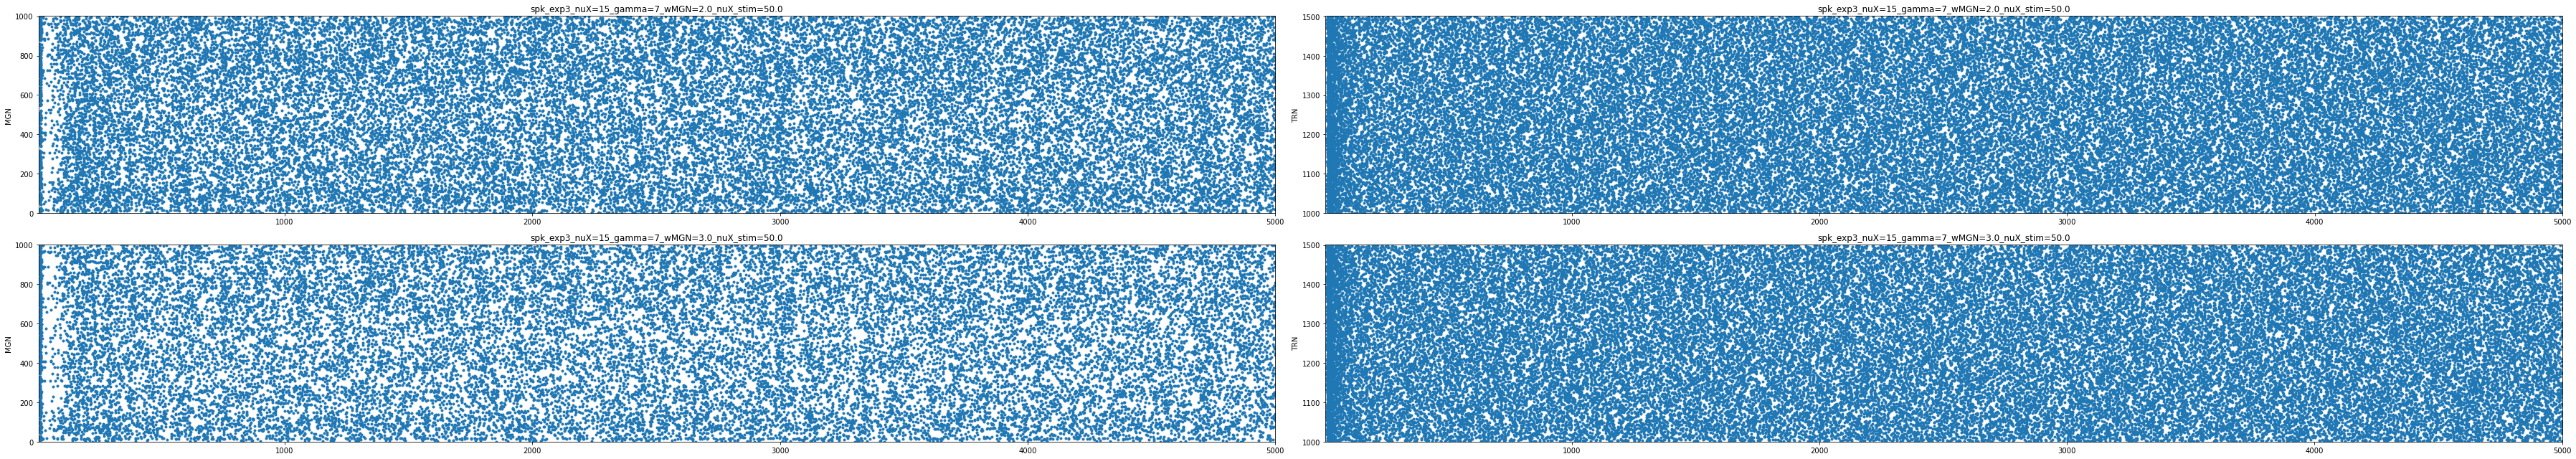

In [80]:
fls = [
    "spk_exp3_nuX=15_gamma=7_wMGN=2.0_nuX_stim=50.0",
    "spk_exp3_nuX=15_gamma=7_wMGN=3.0_nuX_stim=50.0",
    ]

fig, ax = plt.subplots(nrows=len(fls), ncols=2)

for idx, fl in enumerate(fls):
    d = pd.read_pickle("demyelination/data/exp3/activity/" + fl)

    fig.set_size_inches(50, 9)
    #plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

    for axis, part in zip([0, 1], d.spikeobj.keys()):
        d.spikeobj[part].raster_plot(ax=ax[idx][axis], dt=10, display=False)
        ax[idx][axis].set_ylabel(part)
        ax[idx][axis].set_title(fl)

fig.tight_layout()

In [28]:
! ls demyelination/data/exp3/activity/
#| grep -E nuX=15

'spk_exp3_nuX=10_gamma=10_wMGN=1.0_nuX_stim=10.0'
'spk_exp3_nuX=10_gamma=10_wMGN=1.0_nuX_stim=15.0'
'spk_exp3_nuX=10_gamma=10_wMGN=1.0_nuX_stim=20.0'
'spk_exp3_nuX=10_gamma=10_wMGN=1.0_nuX_stim=25.0'
'spk_exp3_nuX=10_gamma=10_wMGN=1.0_nuX_stim=30.0'
'spk_exp3_nuX=10_gamma=10_wMGN=1.0_nuX_stim=35.0'
'spk_exp3_nuX=10_gamma=10_wMGN=1.0_nuX_stim=40.0'
'spk_exp3_nuX=10_gamma=10_wMGN=1.0_nuX_stim=45.0'
'spk_exp3_nuX=10_gamma=10_wMGN=1.0_nuX_stim=5.0'
'spk_exp3_nuX=10_gamma=10_wMGN=1.0_nuX_stim=50.0'
'spk_exp3_nuX=10_gamma=10_wMGN=1.5_nuX_stim=10.0'
'spk_exp3_nuX=10_gamma=10_wMGN=1.5_nuX_stim=15.0'
'spk_exp3_nuX=10_gamma=10_wMGN=1.5_nuX_stim=20.0'
'spk_exp3_nuX=10_gamma=10_wMGN=1.5_nuX_stim=25.0'
'spk_exp3_nuX=10_gamma=10_wMGN=1.5_nuX_stim=30.0'
'spk_exp3_nuX=10_gamma=10_wMGN=1.5_nuX_stim=35.0'
'spk_exp3_nuX=10_gamma=10_wMGN=1.5_nuX_stim=40.0'
'spk_exp3_nuX=10_gamma=10_wMGN=1.5_nuX_stim=45.0'
'spk_exp3_nuX=10_gamma=10_wMGN=1.5_nuX_stim=5.0'
'spk_exp3_nuX=10_gamma=10_wMGN=1.5_nuX_stim=50.0'
's

## Last Know Good Configuration

In [42]:
! pwd

/home/hunaid/simulenation/src


In [60]:
ax[1]

<AxesSubplot:>

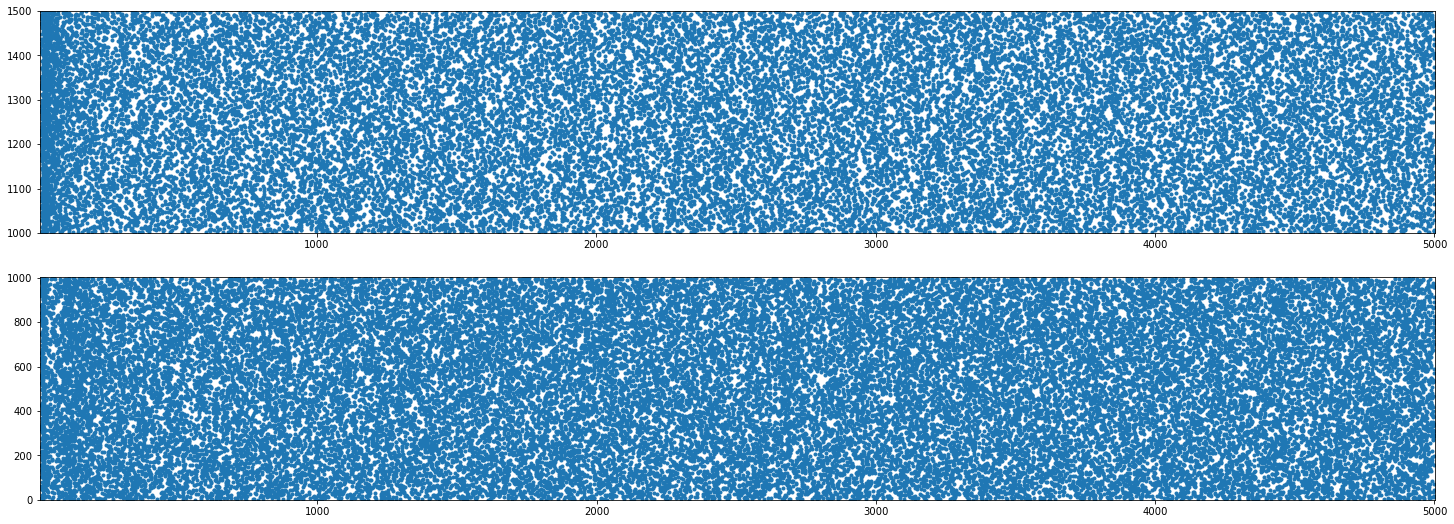

In [71]:
p = pd.read_pickle("demyelination/data/exp1/activity/spk_exp1_nuX=12_gamma=4_nTRN=500")

fig, ax = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(25, 9)

p.spikeobj['TRN'].raster_plot(ax=ax[0], display=False)
p.spikeobj['MGN'].raster_plot(ax=ax[1], display=False)

plt.show()

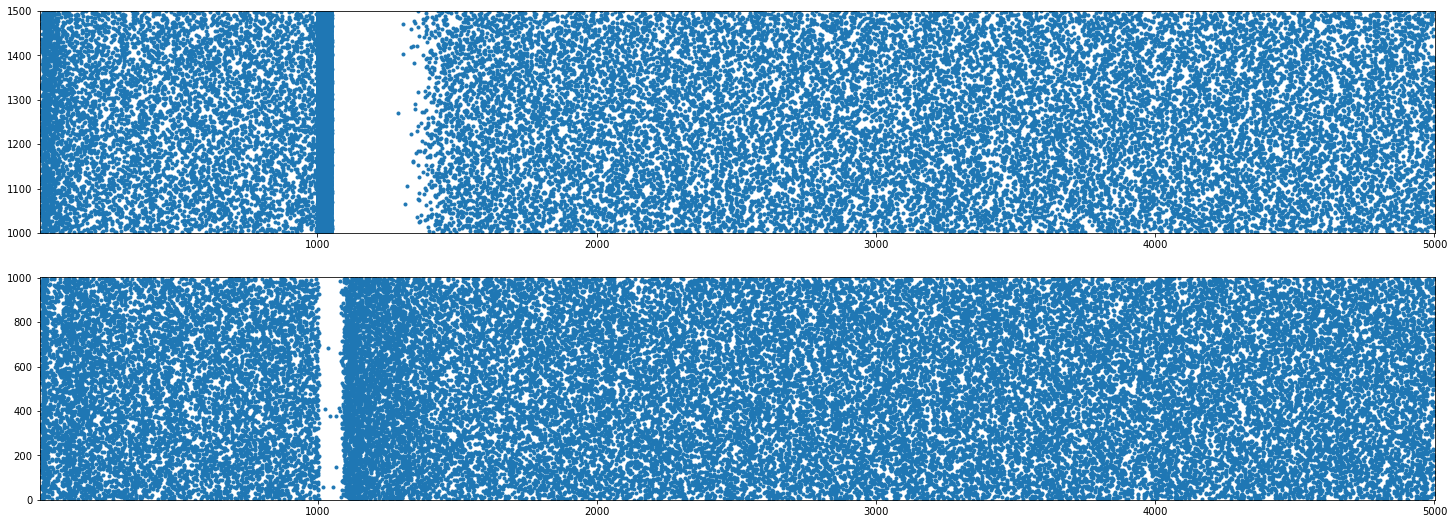

In [72]:
p = pd.read_pickle("demyelination/data/exp2/activity/spk_exp2_nuX=12_gamma=4_nTRN=500")

fig, ax = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(25, 9)

p.spikeobj['TRN'].raster_plot(ax=ax[0], display=False)
p.spikeobj['MGN'].raster_plot(ax=ax[1], display=False)

plt.show()

In [79]:

# fig, ax = plt.subplots(nrows=1, ncols=1)
# fig.set_size_inches(25, 9)

# ax.plot(p.spikeobj['TRN'].firing_rate(5000))
# ax.plot(p.spikeobj['MGN'].firing_rate(5000))
